In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.python.framework import ops
from tf_utils import random_mini_batches, L_layer_model, one_hot_matrix, L_model_validation, L_model_train, predict, raw2train, Lmodel_hypersearch_v2, Lmodel_hypersearch_v3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
%matplotlib inline
np.random.seed(1)

In [2]:
X_train_origin = pd.read_csv('C://erdongguo/titanic/X_train_v2.csv')
X_test_origin = pd.read_csv('C://erdongguo/titanic/X_test_v2.csv')
Y_train_origin = pd.read_csv('C://erdongguo/titanic/Y_train_v2.csv')

In [3]:
Y_train_origin = Y_train_origin.Survived

In [4]:
X_train, X_test, Y_train, Y_test = raw2train(X_train_origin, Y_train_origin)

In [5]:
print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 712
number of test examples = 179
X_train shape: (15, 712)
Y_train shape: (2, 712)
X_test shape: (15, 179)
Y_test shape: (2, 179)


In [6]:
layers_dims = [15, 20, 20, 20, 15, 5, 2]

Cost after epoch 0: 0.823245
Cost after epoch 100: 0.401680
Cost after epoch 200: 0.401923
Cost after epoch 300: 0.399540
Cost after epoch 400: 0.366162


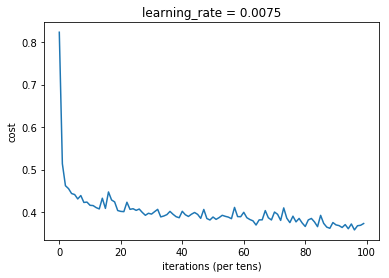

Train Accuracy: 0.867977
Test Accuracy: 0.810056


In [7]:
L_layer_model(X_train, Y_train, X_test, Y_test, layers_dims, learning_rate = 0.0075, lamb = 0.003, 
                  num_epochs = 500, minibatch_size = 38, print_cost = True, output_para = False, plot = True)

In [8]:
L_model_validation(X_train, Y_train, X_test, Y_test, layers_dims = layers_dims, learning_rate = 0.0075, lamb = 0.001, num_epochs = 500)

(0.87640452, 0.77653629)

In [9]:
tic = time.time()

In [11]:
Lmodel_hypersearch_v2(X_train, Y_train, X_test, Y_test, layers_dims = layers_dims, num_iters = 2, threshold = 0.8)

{}

In [12]:
toc = time.time()

In [13]:
print(str((toc - tic) * 1000) + 'ms')

28809.431552886963ms


In [19]:
Lmodel_hypersearch_v2(X_train, Y_train, X_test, Y_test, layers_dims = layers_dims, num_iters = 2, threshold = 0.8)

{}

In [17]:
lr = 0.00068
lb = 0.00026

In [20]:
Lmodel_hypersearch_v3(X_train, Y_train, X_test, Y_test, layers_dims = layers_dims, lr = 0.00068, lb = 0.00026, sig1 = 0.0001, sig2 = 0.0001, num_iters = 100, threshold = 0.82)

{}

Cost after epoch 0: 0.791932
Cost after epoch 100: 0.458021
Cost after epoch 200: 0.405670
Cost after epoch 300: 0.373429
Cost after epoch 400: 0.373991
Cost after epoch 500: 0.370477
Cost after epoch 600: 0.358270
Cost after epoch 700: 0.370304
Cost after epoch 800: 0.362851
Cost after epoch 900: 0.379465
Cost after epoch 1000: 0.347109
Cost after epoch 1100: 0.356198
Cost after epoch 1200: 0.348467
Cost after epoch 1300: 0.347937
Cost after epoch 1400: 0.339404


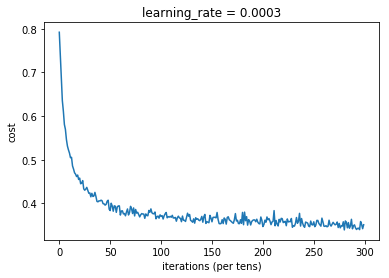

Train Accuracy: 0.898876
Parameters have been trained!


In [21]:
parameters = L_model_train(X_train, Y_train, layers_dims, learning_rate = 0.0003, lamb = 0.001, num_epochs = 1500)

In [24]:
YY_predict = predict(X_test, parameters)